# This project write before, and i want need to write that with BERTopic models

In [4]:
# Importing modules
import pandas as pd
import os
# os.chdir('D:\\My\\Projeh\\TextMining49188\\Data')
# Read data into papers
papers = pd.read_excel('/content/New Data set 1.xls')
# Print head,;[l[[plo\ h76w4-5t]]]
papers.head()

,Authors,Title,Source Title,Document Type,Keywords,Abstract,Year
0,"Liang, W; Zhang, L; Kadoch, M",6G IoT Tracking- and Machine Learning-Enhanced...,ELECTRONICS,Article,6G IoT tracking; supply chain management; bloc...,The 6G Internet of Things (IoT) is of utmost i...,2023
1,Ma Z.; Yang X.; Miao R.,A Big Data-Driven Risk Assessment Method Using...,"Journal of Circuits, Systems and Computers",Article,Big data; machine learning; risk assessment; s...,With the rapid development of economic globali...,2023
2,"Abbas, K; Afaq, M; Khan, TA; Song, WC",A Blockchain and Machine Learning-Based Drug S...,ELECTRONICS,Article,blockchain; machine learning; drug supply chai...,"From the last decade, pharmaceutical companies...",2020
3,Jesse F.F.; Antonini C.; Luque-Vilchez M.,A circularity accounting network: CO2 measurem...,Revista de Contabilidad-Spanish Accounting Review,Article,Accounting networks; Artificial neural network...,This paper proposes to use a type of machine l...,2023
4,"Charles, V; Emrouznejad, A; Gherman, T",A critical analysis of the integration of bloc...,ANNALS OF OPERATIONS RESEARCH,Article,Blockchain; Artificial intelligence; Supply ch...,The integration between blockchain and artific...,2023


In [5]:
papers['Text']= papers["Source Title"].astype(str) +" "+ papers["Abstract"].astype(str)+papers["Keywords"].astype(str)
papers.head()

,Authors,Title,Source Title,Document Type,Keywords,Abstract,Year,Text
0,"Liang, W; Zhang, L; Kadoch, M",6G IoT Tracking- and Machine Learning-Enhanced...,ELECTRONICS,Article,6G IoT tracking; supply chain management; bloc...,The 6G Internet of Things (IoT) is of utmost i...,2023,ELECTRONICS The 6G Internet of Things (IoT) is...
1,Ma Z.; Yang X.; Miao R.,A Big Data-Driven Risk Assessment Method Using...,"Journal of Circuits, Systems and Computers",Article,Big data; machine learning; risk assessment; s...,With the rapid development of economic globali...,2023,"Journal of Circuits, Systems and Computers Wit..."
2,"Abbas, K; Afaq, M; Khan, TA; Song, WC",A Blockchain and Machine Learning-Based Drug S...,ELECTRONICS,Article,blockchain; machine learning; drug supply chai...,"From the last decade, pharmaceutical companies...",2020,"ELECTRONICS From the last decade, pharmaceutic..."
3,Jesse F.F.; Antonini C.; Luque-Vilchez M.,A circularity accounting network: CO2 measurem...,Revista de Contabilidad-Spanish Accounting Review,Article,Accounting networks; Artificial neural network...,This paper proposes to use a type of machine l...,2023,Revista de Contabilidad-Spanish Accounting Rev...
4,"Charles, V; Emrouznejad, A; Gherman, T",A critical analysis of the integration of bloc...,ANNALS OF OPERATIONS RESEARCH,Article,Blockchain; Artificial intelligence; Supply ch...,The integration between blockchain and artific...,2023,ANNALS OF OPERATIONS RESEARCH The integration ...


In [12]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
print(papers["Text"])
# Convert to lowercase
papers['Text'] = papers['Text'].map(lambda x: x.lower())

# Remove non-alphabetic characters
papers['Text'] = papers['Text'].map(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

0      electronics the g internet of things iot is of...
1      journal of circuits systems and computers with...
2      electronics from the last decade pharmaceutica...
3      revista de contabilidadspanish accounting revi...
4      annals of operations research the integration ...
                             ...                        
330    journal on data science and machine learning i...
331    international journal of supply chain and oper...
332     naturalista campano the advent of artificial ...
333     universum   this paper presents a comprehensi...
334    eur chem bull this review research paper aims ...
Name: Text, Length: 335, dtype: object


In [14]:
# Tokenize
papers['Text'] = papers['Text'].map(lambda x: word_tokenize(x))

# Lemmatization
lemmatizer = WordNetLemmatizer()
papers['Text'] = papers['Text'].map(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert back to text
papers['Text'] = papers['Text'].map(lambda x: ' '.join(x))

In [15]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers.Text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['electronics', 'the', 'internet', 'of', 'thing', 'iot', 'is', 'of', 'utmost', 'importance', 'when', 'it', 'come', 'to', 'running', 'and', 'controlling', 'contemporary', 'supply', 'chain', 'blockchain', 'and', 'machine', 'learning', 'ml', 'are', 'two', 'upperlayer', 'technology', 'that']


In [16]:
print(data_words[:1][0][:30])

['electronics', 'the', 'internet', 'of', 'thing', 'iot', 'is', 'of', 'utmost', 'importance', 'when', 'it', 'come', 'to', 'running', 'and', 'controlling', 'contemporary', 'supply', 'chain', 'blockchain', 'and', 'machine', 'learning', 'ml', 'are', 'two', 'upperlayer', 'technology', 'that']


In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [18]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
newStopWords = ['abstract','result','results','aims','aim','introduction','method','methods','conclusion'
                ,'conclusions','study','using','finding','findings','objective','objectives','propose'
                ,'background','research','purpose','material','materials','overview','nan','paper','use','approach'
                ,'literatur','article', 'survey','nannan','systematic', 'ii', "supply", "chain", "management", "model", "system", "supply chain"]
stop_words.extend(newStopWords)
#stop_words.extend(['abstract','result','results','aims','aim','introduction','method','methods','conclusion','conclusions','study','using','finding','findings','objective','objectives','propose','background','research','purpose','material','materials','overview','nan','paper','use','approach','literatur','article', 'survey','audit', 'auditor', 'auditing', 'auditee', 'audits', 'authorsauditor', 'auditability', 'australiaaudit', 'authorsaudit', 'auditable', 'audited', 'authorsaudite', 'authoraudit', 'auditore', 'auditaudit', 'auditorafrican', 'africaauditor', 'limitedauditor', 'sons_ltdaudit', 'licenseaudit', 'elsevier_incaudit', 'italyaudit', 'ltdauditor', 'universityaudit', 'journalaudit', 'juruaudit', 'sons_ltdauditor', 'brenderaudite', 'licenseauditor', 'canadaaudit', 'canadaauditor', 'rights_reservedauditor', 'ltdaudite', 'etalaudit', 'illinoisaudit', 'ltdaudit', 'caaaaudit', 'bvauditor', 'elsevier_bvaudit', 'springer_natureaudit', 'llcaudit', 'new_zealandaudit', 'llcauditor', 'sydneyaudit', 'overaudite', 'elsevier_ltdaudit', 'caaaauditor', 'pressauditor', 'incaudite', 'incauditor', 'delhiaudit', 'theaudite', 'ieeeauditor', 'usaauditor', 'usaaudit', 'murciaaudit', 'reservedauditor', 'literatureaudit', 'vietnamaudit', 'account', 'chartered_accountant', 'accounting', 'accountant', 'ltdaccounte', 'caaaaccounte', 'bvaccounte', 'incaccounte', 'engagement', 'engage', 'engaged', 'disengage', 'disengagement', 'ltdengagement', 'firm', 'confirmation', 'confirmatory_factor', 'ltdfirm', 'affirm', 'reaffirm', 'firmscorporate', 'firmsunliste', 'firmsaudit', 'affirmed', 'testfirm', 'examine', 'examination', 'examination_kit', 'examiner', 'unexamined', 'examining', 'director', 'directorship', 'directorships', 'overlapping_directorship', 'multiple_directorship', 'directory', 'directorial', 'order', 'design_methodology', 'take', 'date', 'order', 'different', 'significantly', 'affect', 'lock', 'low', 'attributable', 'non', 'find', 'cause', 'quo', 'level', 'author', 'first', 'empirically', 'due', 'become', 'average', 'emerald_publishe', 'antecedent', 'impact', 'design', 'factors_affecte', 'likert', 'descriptive_statistic', 'regression', 'significant', 'tc', 'moreover', 'highly', 'adaptable', 'paper', 'terrorist', 'attack', 'role', 'doctor', 'base', 'randomly_selecte', 'methodology', 'card', 'ready', 'create', 'effect', 'sample', 'year', 'model', 'also', 'result', 'especially', 'draw', 'attention', 'bring', 'publish', 'wake', 'new', 'light', 'block', 'holder', 'year_observation', 'jordanian', 'use', 'hypothesis', 'show', 'type', 'however', 'come', 'fast', 'aid', 'calamity', 'assumption', 'add', 'body', 'adverse', 'administer', 'malaysian', 'activity', 'background', 'topic', 'able', 'include', 'islamic', 'actual', 'believe', 'study', 'desk', 'possible', 'many', 'yet', 'apply', 'well', 'appear', 'therefore', 'literature', 'addition', 'eg', 'interview', 'manual', 'egyptian', 'next', 'see', 'purposeful', 'spt', 'great', 'area', 'aim', 'pls', 'additionally', 'affected', 'likewise', 'conclude', 'availability', 'copy', 'academy', 'pre', 'accordance', 'factor', 'highlight', 'put', 'double', 'useful', 'away', 'review', 'researcher', 'address', 'american', 'omani', 'answer', 'user', 'thus', 'oman', 'adapt', 'adaptive', 'know', 'adaptation', 'whole', 'elsevi', 'new_zealand', 'much', 'far', 'nevertheless', 'live', 'boy', 'number', 'case', 'carry', 'anp', 'begin', 'methodological', 'choose', 'scope', 'hold', 'holding', 'austerity', 'black', 'together', 'brief', 'assist', 'australian', 'semantic', 'arise', 'jakarta', 'convenience_sample', 'active', 'database', 'build', 'survey', 'statistical', 'affiliate', 'ols_regression', 'usefulness', 'adjust', 'likely', 'adjustment', 'ansell', 'action', 'ally', 'acquire', 'approach', 'german', 'already', 'acknowledge', 'almost', 'end', 'basis', 'later', 'building', 'ukrainian', 'arrival', 'drive', 'near', 'aliance', 'ukraine', 'actor', 'science', 'achieve', 'criterion', 'iraqi', 'break', 'few', 'affiliation', 'kruskal', 'rank', 'accept', 'exact', 'heckman', 'sls', 'equation', 'attribution_cc', 'book', 'logic', 'alter', 'backstage', 'umbrella', 'rd', 'absence', 'always', 'equal', 'man', 'elsevier_incaudit', 'archival', 'multivariate_regression', 'equation_modele', 'seem', 'accuracy', 'interviewee', 'access', 'application', 'avail', 'less_likely', 'even', 'statistically', 'significance', 'accordingly', 'factors_affecting', 'alert', 'equation_modelle', 'pls_sem', 'target', 'available', 'actively', 'attain', 'survivor', 'ti', 'tbp', 'accord', 'bullet', 'random', 'likelihood', 'synthesis', 'cem', 'subsample', 'ilis', 'adversely', 'go', 'broad', 'inv', 'amount', 'capture', 'accomplish', 'malaysia', 'tunisian', 'calculate', 'clause', 'ag_rapid', 'calibration', 'cov', 'regardless', 'authorscomputer', 'italyaudit', 'chemical', 'rapidly', 'one', 'affordable', 'found', 'copyright', 'gaza_strip', 'palestine', 'reviewer', 'write', 'аудит', 'ираке', 'время', 'arabian', 'authorcompanie', 'spanish', 'differentiate', 'amra', 'probability', 'purposive_sample', 'attendee', 'copyright_inderscience', 'classify', 'sms', 'modelling', 'akn', 'taufik', 'manually', 'advocate', 'authorseuropean', 'zimbabwe', 'topical', 'arm', 'ever', 'attenuate', 'overall', 'arouse', 'want', 'appearance', 'thanh', 'doan', 'thu', 'actually', 'adequately', '基于pecking', '模型的研究', 'chinese', 'logit', 'acceptable', 'alleviate', 'engineering', 'calculation', 'aforementione', 'accurately', 'accurate', 'classification', 'bahrain', 'aess', 'fuzzy', 'tra', 'attitude', 'southern', 'japanese', 'sciencesall', 'belong', 'driver', 'logical', 'do', 'open', 'maxqda', 'category', 'adherence', 'still', 'firstly', 'misuse', 'apart', 'appeal', 'sponsor', 'statistical_package', 'social_science', 'spss', 'baseline', 'rise', 'multilevel', 'tier', 'english', 'avenue', 'bu', 'herfindahl', 'highlighting', 'accrue', 'call', 'purpose', 'rarely', 'taken', 'malaya', 'openness', 'dalam', 'survival', 'nz', 'sm', 'purposive', 'bse', 'random_sample', 'item', 'border', 'attractive', 'causality', 'open_access', 'absolute', 'back', 'research', 'causal', 'taken_together', 'asx', 'insignificant', 'basically', 'daily', 'table', 'adhere', 'spss_software', 'nineteenth', 'day', 'statistic', 'engine', 'basic', 'typology', 'proposal', 'cairn', 'worthwhile', 'inconclusive', 'indian', 'affiliated', 'activate', 'bird', 'stone', 'apparently', 'regressive', 'logistic', 'baltic', 'korean', 'bibliometric', 'article', 'scopus_database', 'chapter', 'beverage', 'fiji', 'cater', 'bind', 'buffer', 'station', 'tunisia', 'inderscience_enterprise', 'asymptotic', 'logit_regression', 'civil', 'fourth', 'fifth', 'art', 'enter', 'classical', 'academia', 'hypothesize', 'little', 'synthetic', 'get', 'armchair', 'greatly', 'alone', 'bsc', 'bibliographic', 'logistic_regression', 'malawi', 'paradigm', 'survive', 'https_license', 'greece', 'cancellation', 'ceiling', 'quotation', 'kospi', 'assume', 'purposive_sampling', 'authors_licensee', 'museum', 'ask', 'class', 'sphere', 'blow', 'lab', 'thi', 'quotient', 'sql', 'differently', 'canvas', 'goffman', 'nest', 'anglo', 'differential', 'united_arab', 'hypothese', 'england', 'possibility', 'itaq', 'thorough', 'seldom', 'african', 'danish', 'denmark', 'apparent', 'konkurencyjnosc', 'audytow', 'growing_science', 'classifie', 'agenda', 'cite', 'miklo', 'purposively', 'atypical', 'newly', 'south_african', 'thoughtfully', 'ir', 'italian', 'axial', 'church', 'francis', 'randomly', 'enjoy', 'insignificantly', 'accumulate', 'regress', 'typically', 'chip', 'et', 'email', 'iranian', 'house', 'eld', 'finland', 'bgds', 'bod', 'attract', 'north', 'northern', 'os', 'binary_logistic', 'unlikely', 'static', 'branch', 'bound', 'beg', 'hypothesise', 'grade', 'australiaa', 'french', 'burden', 'allure', 'administracion_de', 'paragraph', 'appealing', 'ge', 'higher', 'apparatus', 'stata', 'conclusive', 'modeling', 'qu', 'australasian', 'abtract', 'buddhist', 'thought', 'zone', 'buddhism', 'statistically_significant', 'https', 'bangladesh', 'asian', 'yemen', 'target_population', 'ago', 'busyness', 'today', 'unaffected', 'diffuse', 'swedish', 'probabilistic', 'anonymity', 'nonanonymous', 'anonymous', 'behind', 'command', 'beat', 'ssb', 'citedbangladesh', 'linear_regression', 'irish', 'beancounter', 'celebrate', 'citation', 'publishe', 'authorship', 'gephi', 'nigerian', 'efftv', 'arguably', 'purposefully', 'south_africa', 'bosa', 'abreast', 'kap', 'afford', 'borne', 'authorscontract', 'net', 'nigeria', 'thank', 'campaign', 'crackdown', 'tato', 'se', 'latin', 'busy_season', 'busy', 'springer_nature', 'myth', 'classification_shifte', 'misclassifie', 'norwegian', 'dechow', 'roychowdhury', 'conscience', 'bt', 'acquaint', 'autoethnography', 'infuse', 'classroom', 'elsevier', 'accentuate', 'battery', 'rare', 'achievement', 'bottom', 'na', 'elsevier_bvaudit', 'none', 'augment', 'covariate', 'aanr', 'bourdieu', 'celerier', 'botey', 'springer_science', 'springer_natureaudit', 'metric', 'sum', 'united_state', 'emerald_publishing', 'highlighted', 'kyiv', 'brazilian', 'usp', 'arrive', 'com', 'equally', 'categorize', 'belgium', 'methodical', 'door', 'cancel', 'dadr', 'dadrs', 'used', 'differentiation', 'additive', 'ranking', 'igi', 'springer', 'sweden', 'differentially', 'taking', 'ols', 'quota', 'turkey', 'binomial', 'germany', 'firewall', 'miss', 'activism', 'spur', 'activist', 'accelerate', 'buuren', 'heavy', 'elsevier_ltdaudit', 'caaaauditor', 'pressauditor', 'incaudite', 'incauditor', 'delhiaudit', 'theaudite', 'ieeeauditor', 'usaauditor', 'usaaudit', 'murciaaudit', 'reservedauditor', 'literatureaudit', 'vietnamaudit', 'account', 'chartered_accountant', 'accounting', 'accountant', 'ltdaccounte', 'caaaaccounte', 'bvaccounte', 'incaccounte', 'engagement', 'engage', 'engaged', 'disengage', 'disengagement', 'ltdengagement', 'firm', 'confirmation', 'confirmatory_factor', 'ltdfirm', 'affirm', 'reaffirm', 'firmscorporate', 'firmsunliste', 'firmsaudit', 'affirmed', 'testfirm', 'examine', 'examination', 'examination_kit', 'examiner', 'unexamined', 'examining', 'director', 'directorship', 'directorships', 'overlapping_directorship', 'multiple_directorship', 'directory', 'directorial', 'order', 'design_methodology', 'take', 'date', 'order', 'different', 'significantly', 'affect', 'lock', 'low', 'attributable', 'non', 'find', 'cause', 'quo', 'level', 'author', 'first', 'empirically', 'due', 'become', 'average', 'emerald_publishe', 'antecedent', 'impact', 'design', 'factors_affecte', 'likert', 'descriptive_statistic', 'regression', 'significant', 'tc', 'moreover', 'highly', 'adaptable', 'paper', 'terrorist', 'attack', 'role', 'doctor', 'base', 'randomly_selecte', 'methodology', 'card', 'ready', 'create', 'effect', 'sample', 'year', 'model', 'also', 'result', 'especially', 'draw', 'attention', 'bring', 'publish', 'wake', 'new', 'light', 'block', 'holder', 'year_observation', 'jordanian', 'use', 'hypothesis', 'show', 'type', 'however', 'come', 'fast', 'aid', 'calamity', 'assumption', 'add', 'body', 'adverse', 'administer', 'malaysian', 'activity', 'background', 'topic', 'able', 'include', 'islamic', 'actual', 'believe', 'study', 'desk', 'possible', 'many', 'yet', 'apply', 'well', 'appear', 'therefore', 'literature', 'addition', 'eg', 'interview', 'manual', 'egyptian', 'next', 'see', 'purposeful', 'spt', 'great', 'area', 'aim', 'pls', 'additionally', 'affected', 'likewise', 'conclude', 'availability', 'copy', 'academy', 'pre', 'accordance', 'factor', 'highlight', 'put', 'double', 'useful', 'away', 'review', 'researcher', 'address', 'american', 'omani', 'answer', 'user', 'thus', 'oman', 'adapt', 'adaptive', 'know', 'adaptation', 'whole', 'elsevi', 'new_zealand', 'much', 'far', 'nevertheless', 'live', 'boy', 'number', 'case', 'carry', 'anp', 'begin', 'methodological', 'choose', 'scope', 'hold', 'holding', 'austerity', 'black', 'together', 'brief', 'assist', 'australian', 'semantic', 'arise', 'jakarta', 'convenience_sample', 'active', 'database', 'build', 'survey', 'statistical', 'affiliate', 'ols_regression', 'usefulness', 'adjust', 'likely', 'adjustment', 'ansell', 'action', 'ally', 'acquire', 'approach', 'german', 'already', 'acknowledge', 'almost', 'end', 'basis', 'later', 'building', 'ukrainian', 'arrival', 'drive', 'near', 'aliance', 'ukraine', 'actor', 'science', 'achieve', 'criterion', 'iraqi', 'break', 'few', 'affiliation', 'kruskal', 'rank', 'accept', 'exact', 'heckman', 'sls', 'equation', 'attribution_cc', 'book', 'logic', 'alter', 'backstage', 'umbrella', 'rd', 'absence', 'always', 'equal', 'man', 'elsevier_incaudit', 'archival', 'multivariate_regression', 'equation_modele', 'seem', 'accuracy', 'interviewee', 'access', 'application', 'avail', 'less_likely', 'even', 'statistically', 'significance', 'accordingly', 'factors_affecting', 'alert', 'equation_modelle', 'pls_sem', 'target', 'available', 'actively', 'attain', 'survivor', 'ti', 'tbp', 'accord', 'bullet', 'random', 'likelihood', 'synthesis', 'cem', 'subsample', 'ilis', 'adversely', 'go', 'broad', 'inv', 'amount', 'capture', 'accomplish', 'malaysia', 'tunisian', 'calculate', 'clause', 'ag_rapid', 'calibration', 'cov', 'regardless', 'authorscomputer', 'italyaudit', 'chemical', 'rapidly', 'one', 'affordable', 'found', 'copyright', 'gaza_strip', 'palestine', 'reviewer', 'write', 'аудит', 'ираке', 'время', 'arabian', 'authorcompanie', 'spanish', 'differentiate', 'amra', 'probability', 'purposive_sample', 'attendee', 'copyright_inderscience', 'classify', 'sms', 'modelling', 'akn', 'taufik', 'manually', 'advocate', 'authorseuropean', 'zimbabwe', 'topical', 'arm', 'ever', 'attenuate', 'overall', 'arouse', 'want', 'appearance', 'thanh', 'doan', 'thu', 'actually', 'adequately', '基于pecking', '模型的研究', 'chinese', 'logit', 'acceptable', 'alleviate', 'engineering', 'calculation', 'aforementione', 'accurately', 'accurate', 'classification', 'bahrain', 'aess', 'fuzzy', 'tra', 'attitude', 'southern', 'japanese', 'sciencesall', 'belong', 'driver', 'logical', 'do', 'open', 'maxqda', 'category', 'adherence', 'still', 'firstly', 'misuse', 'apart', 'appeal', 'sponsor', 'statistical_package', 'social_science', 'spss', 'baseline', 'rise', 'multilevel', 'tier', 'english', 'avenue', 'bu', 'herfindahl', 'highlighting', 'accrue', 'call', 'purpose', 'rarely', 'taken', 'malaya', 'openness', 'dalam', 'survival', 'nz', 'sm', 'purposive', 'bse', 'random_sample', 'item', 'border', 'attractive', 'causality', 'open_access', 'absolute', 'back', 'research', 'causal', 'taken_together', 'asx', 'insignificant', 'basically', 'daily', 'table', 'adhere', 'spss_software', 'nineteenth', 'day', 'statistic', 'engine', 'basic', 'typology', 'proposal', 'cairn', 'worthwhile', 'inconclusive', 'indian', 'affiliated', 'activate', 'bird', 'stone', 'apparently', 'regressive', 'logistic', 'baltic', 'korean', 'bibliometric', 'article', 'scopus_database', 'chapter', 'beverage', 'fiji', 'cater', 'bind', 'buffer', 'station', 'tunisia', 'inderscience_enterprise', 'asymptotic', 'logit_regression', 'civil', 'fourth', 'fifth', 'art', 'enter', 'classical', 'academia', 'hypothesize', 'little', 'synthetic', 'get', 'armchair', 'greatly', 'alone', 'bsc', 'bibliographic', 'logistic_regression', 'malawi', 'paradigm', 'survive', 'https_license', 'greece', 'cancellation', 'ceiling', 'quotation', 'kospi', 'assume', 'purposive_sampling', 'authors_licensee', 'museum', 'ask', 'class', 'sphere', 'blow', 'lab', 'thi', 'quotient', 'sql', 'differently', 'canvas', 'goffman', 'nest', 'anglo', 'differential', 'united_arab', 'hypothese', 'england', 'possibility', 'itaq', 'thorough', 'seldom', 'african', 'danish', 'denmark', 'apparent', 'konkurencyjnosc', 'audytow', 'growing_science', 'classifie', 'agenda', 'cite', 'miklo', 'purposively', 'atypical', 'newly', 'south_african', 'thoughtfully', 'ir', 'italian', 'axial', 'church', 'francis', 'randomly', 'enjoy', 'insignificantly', 'accumulate', 'regress', 'typically', 'chip', 'et', 'email', 'iranian', 'house', 'eld', 'finland', 'bgds', 'bod', 'attract', 'north', 'northern', 'os', 'binary_logistic', 'unlikely', 'static', 'branch', 'bound', 'beg', 'hypothesise', 'grade', 'australiaa', 'french', 'burden', 'allure', 'administracion_de', 'paragraph', 'appealing', 'ge', 'higher', 'apparatus', 'stata', 'conclusive', 'modeling', 'qu', 'australasian', 'abtract', 'buddhist', 'thought', 'zone', 'buddhism', 'statistically_significant', 'https', 'bangladesh', 'asian', 'yemen', 'target_population', 'ago', 'busyness', 'today', 'unaffected', 'diffuse', 'swedish', 'probabilistic', 'anonymity', 'nonanonymous', 'anonymous', 'behind', 'command', 'beat', 'ssb', 'citedbangladesh', 'linear_regression', 'irish', 'beancounter', 'celebrate', 'citation', 'publishe', 'authorship', 'gephi', 'nigerian', 'efftv', 'arguably', 'purposefully', 'south_africa', 'bosa', 'abreast', 'kap', 'afford', 'borne', 'authorscontract', 'net', 'nigeria', 'thank', 'campaign', 'crackdown', 'tato', 'se', 'latin', 'busy_season', 'busy', 'springer_nature', 'myth', 'classification_shifte', 'misclassifie', 'norwegian', 'dechow', 'roychowdhury', 'conscience', 'bt', 'acquaint', 'autoethnography', 'infuse', 'classroom', 'elsevier', 'accentuate', 'battery', 'rare', 'achievement', 'bottom', 'na', 'elsevier_bvaudit', 'none', 'augment', 'covariate', 'aanr', 'bourdieu', 'celerier', 'botey', 'springer_science', 'springer_natureaudit', 'metric', 'sum', 'united_state', 'emerald_publishing', 'highlighted', 'kyiv', 'brazilian', 'usp', 'arrive', 'com', 'equally', 'categorize', 'belgium', 'methodical', 'door', 'cancel', 'dadr', 'dadrs', 'used', 'differentiation', 'additive', 'ranking', 'igi', 'springer', 'sweden', 'differentially', 'taking', 'ols', 'quota', 'turkey', 'binomial', 'germany', 'firewall', 'miss', 'activism', 'spur', 'activist', 'accelerate', 'buuren', 'heavy', 'elsevier_ltdaudit', 'assembly', 'lb', 'aaer', 'abrupt', 'byrne', 'et_al', 'british', 'chocolate', 'alteration', 'ende', 'srac_romanian', 'ethiopian', 'adonis', 'abbey', 'τb', 'categorical', 'authorsanti', 'authoritative', 'oz', 'browse', 'yemeni', 'acquiesce', 'unaddresse', 'unused', 'authorsadvance', 'noise', 'ivica', 'heavily', 'publisher', 'broadly', 'attach', 'cent', 'desktop', 'buffering', 'john_wiley', 'aggravate', 'behalf', 'categorising', 'categorise', 'graphically', 'australianan', 'appreciate', 'abgs', 'abg', 'benin', 'francophone', 'ekeh', 'greenhouse', 'engineer', 'lateral', 'mfc', 'root_cause', 'hypothetical', 'known', 'vd', 'wse', 'myopic', 'affective', 'altogether', 'push', 'andersen', 'aser', 'alarm', 'typical', 'incanalytical', 'synthesize', 'seemingly', 'equate', 'authorsagency', 'publishing', 'agatha', 'christie', 'thousand', 'nearly', 'cue', 'off', 'log', 'speak', 'andml', 'being', 'russian', 'jel', 'categorization', 'cq', 'zogp', 'academe', 'never', 'broaden', 'showcase', 'brown', 'quote', 'dei', 'polish', 'aaa', 'synthese', 'dampen', 'confuse', 'blue', 'wtd', 'wtds', 'openly', 'nfc', 'kazakh', 'like', 'acpcinnovation', 'nd', 'barrage', 'binary', 'uk', 'md', 'indifferent', 'arab', 'aversion', 'bls', 'accelerated_filer', 'alleged', 'breached', 'tcs', 'abet', 'abusive', 'franzel', 'signify', 'balakrishnan', 'concluding', 'takeoff', 'driving', 'chookaszian', 'alternatively', 'bayesian', 'con', 'addressing', 'c_score', 'pmsos', 'psmos', 'altman', 'resultant', 'worry', 'blind', 'advertising', 'vs', 'united_kingdom', 'probationary', 'catch', 'bitten', 'twice', 'writing', 'altamonte', 'adolescent', 'arena', 'aesthetic', 'adolescence', 'yellow', 'causation', 'architecture', 'uae', 'excellent', 'zealandpartner', 'heated', 'car', 'award', 'useable', 'pearson', 'affair', 'iraquie', 'iraquiano', 'adam', 'bulk', 'authorscloud', 'cl', 'applying', 'suchman', 'artefact', 'fire', 'parrot', 'http', 'bolsa', 'iraque', 'exactitud', 'iraqui', 'authorsaccuracy', 'iv', 'arke', 'wo', 'inderscience', 'wos', 'abundance', 'aside', 'aut', 'marzooqi', 'soon', 'bivariate', 'focused', 'zbysław', 'dobrowolski', 'resulted', 'apprehension', 'authorsactual', 'capta', 'mcmeeke', 'aspirant', 'adding', 'bibliometrix', 'package', 'abstract', 'appease', 'civil_law', 'belgian', 'israeli', 'birth', 'bpk', 'censure', 'boone', 'zechman', 'alike', 'abfee', 'kosovo', 'autocorrelation', 'arellano', 'arb', 'easy', 'publishersease', 'possibly', 'euro', 'sobel', 'equation_modelling', 'niche', 'conclusively', 'cast', 'even_though', 'backdrop', 'thompson', 'anywhere', 'briefly', 'blur', 'love', 'rarefaction', 'alsufy', 'arithmetic', 'descriptive_statistics', 'hypothesized', 'drawing', 'north_macedonia', 'bfe', 'household', 'kupina', 'tell', 'ashanti', 'zimbabwean', 'south', 'undue', 'de_la', 'actorhood', 'fare', 'researchcontent', 'accomptant', 'famous', 'wonderful', 'asepuc', 'doubly', 'drink', 'borsa', 'forth', 'akin', 'probable', 'bag', 'baye', 'abound', 'authorsict', 'canadian', 'burgeon', 'alagribusiness', 'graph', 'accumulation', 'crack', 'billion', 'dollar', 'attractiveness', 'absurd', 'brazil', 'achievable', 'st', 'archive', 'cautious', 'inside', 'coherence', 'wlb', 'abnegation', 'backfire', 'advent', 'tea', 'authentic', 'wright', 'cence', 'abolishment', 'ascribe', 'ch', 'along', 'arkansa', 'takeaway', 'pract', 'xyz', 'adapted', 'austrian', 'swiss', 'libyan', 'lbs', 'libya', 'pdf', 'bully', 'oscar', 'err', 'southwest', 'blunder', 'inti', 'administrate', 'bangladeshi', 'apbn', 'tbat', 'mdpi_basel', 'exactly', 'everyday', 'breadth', 'activitie', 'acrual', 'abdolmohammadi', 'alasdair', 'amenable', 'wellbeing', 'bign', 'criteria', 'box', 'amongst', 'adx', 'attainment', 'dress', 'bare', 'bf', 'affirm', 'bumiputera', 'stat', 'alcohol', 'ii', 'bist', 'acceptably', 'aaoifi', 'cpoe', 'applie', 'aftermath', 'afterwards', 'tr', 'beginner', 'zealandagency', 'asepucforeign', 'ltdengland', 'bibliography', 'cassell', 'boomerang', 'app', 'slr', 'thoughtful', 'united', 'candidate', 'affordance', 'affording', 'cautiously', 'spherical', 'aktienindex', 'misclassify', 'dark', 'jcgc', 'anglo_saxon', 'bvnan', 'pakistani', 'farther', 'unaddressed', 'yearly', 'ahead', 'ballou', 'backlog', 'greater', 'elsewhere', 'boly', 'mcvay', 'highest', 'advertise', 'ltdaffect', 'morning', 'star', 'etc', 'boc', 'typologie', 'romanian', 'babe', 'calibre', 'cozy', 'synthesise', 'aikin', 'assay', 'firsthand', 'brazel', 'bradbury', 'rouse', 'choreography', 'chorchain', 'ivreg', 'ivprobit', 'turkish', 'espouse', 'logapw', 'omanization', 'logistical', 'pederson', 'pedersen', 'bullwhip', 'king', 'usd', 'thoroughly', 'classic', 'dnn', 'graphical', 'appreciation', 'bvmt', 'farabi', 'reviewing', 'outnumber', 'abductive', 'holdout', 'asean', 'authorsbusiness', 'bandung', 'basilicata', 'switzerlandcasi', 'signification', 'ss', 're', 'akademiya', 'jaffar', 'chemistry', 'breakthrough', 'frst', 'om', 'paperless', 'wydawnictwo', 'breast', 'italiane', 'llcapplication', 'authorsinternal', 'spherical_fuzzy', 'fuzziness', 'toyota', 'basel', 'arising', 'befall', 'ing', 'eep', 'romania', 'fuzzify', 'cart', 'aids', 'living', 'ssae', 'wmcgp', 'asociacion', 'anonim', 'χ²', 'authorscreative', 'myopia', 'purposedure', 'findingsbase', 'purposehow', 'approachfive', 'approachsurvey', 'cabinet', 'authorisation', 'resultantly', 'aforementioned', 'resultsearning', 'banten', 'cell', 'isk', 'avid', 'outclass', 'wolfsberg', 'accede', 'alarmingly', 'afternoon', 'sta', 'statist', 'newspaper', 'band', 'netherland', 'louse', 'addressee', 'famously', 'typological', 'append', 'ugandan', 'uganda', 'theta', 'plot', 'resultsdata', 'resultsinternal', 'int', 'activitiesaudit', 'diffused', 'achille', 'unresearched', 'topicbig', 'usersinternal', 'nedr', 'cancer', 'ycmrf', 'prac', 'ukrainestate', 'ee', 'researchhuman', 'achieving', 'affirmed', 'areainternal', 'anecdotal', 'heat', 'yearin', 'broader', 'anbar', 'spearman', 'tatt', 'kuwait', 'mystery', 'gtf', 'italycorporate', 'jordan', 'kingdom', 'adherent', 'bgd', 'iteme', 'purposequality', 'psycap', 'approachiae', 'approachdata', 'findingsa', 'valuefinding', 'purposethis', 'pmc', 'purposean', 'bpkp', 'cape', 'these', 'methodologie', 'opening', 'underused', 'apprise', 'adept', 'carve', 'accessibility', 'purposedata', 'activation', 'op', 'purposein', 'atlasti', 'iraqinternal', 'nepal', 'adr', 'alfo', 'lightness', 'fraudresearch', 'approachbase', 'equational', 'approacha', 'dubai', 'au', 'deci', 'areasystem', 'assault', 'ssfta', 'absorptive', 'autarchic', 'studysocial', 'baidu', 'covariance', 'audio', 'methoddecision', 'purposeauditor', 'beget', 'te', 'affiliative', 'classified', 'apparel', 'ed', 'burt', 'findingsthe', 'eesfindingsthe', 'findingsresult', 'trotman', 'excellence', 'shower', 'availablehealth', 'irbn', 'pbo', 'surveying', 'arisechange', 'twentieth', 'becoming_informe', 'iraq', 'capturing', 'purposedespite', 'airesearch', 'Palestinian', 'covid', 'covid_pandemic', 'covid_lockdown', 'ieeecovid', 'panbio_covid', 'executioncovid', 'inccovid', 'coronaviru', 'coronavirus_disease', 'coronavirus', 'corona', 'covid_pandemic', 'pandemic', 'pandemicdesign', 'pandemicaudit', 'pandemicpublic', 'qualitykey', 'purposequality', 'qualitydesign', 'qualityindustry', 'qualitydata', 'epidemic', 'investigate', 'investigation', 'investigator', 'uninvestigated', 'investigative'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [19]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:2])


[['electronic', 'internet', 'utmost', 'importance', 'come', 'run', 'control', 'contemporary', 'blockchain', 'machine', 'learn', 'ml', 'technology', 'assist', 'secure', 'automate', 'iot', 'first', 'integrate', 'blockchain', 'technology', 'modern', 'facilitate', 'effective', 'communication', 'partner', 'second', 'inbound', 'logistic', 'task', 'prediction', 'develop', 'multihead', 'attention', 'mhabase', 'gated_recurrent', 'finally', 'mhabase', 'satisfy', 'fitting', 'efficiency', 'prediction', 'precision', 'compare', 'competitorsg', 'iot', 'track', 'blockchain', 'machine', 'learn', 'multihead', 'attentionbase', 'gru'], ['circuit', 'computer', 'rapid', 'development', 'economic', 'globalization', 'population', 'capital', 'information', 'rapidly', 'flow', 'cluster', 'region', 'important', 'transportation', 'mode', 'airport', 'play', 'increasingly', 'important', 'role', 'promote', 'regional', 'economic', 'development', 'yield', 'number', 'airport', 'economic', 'promotion', 'area', 'boost', 'e

In [20]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])


# # LDA Optimal Model

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 2), (29, 2), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1)]]


In [21]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('assist', 1),
  ('attention', 1),
  ('attentionbase', 1),
  ('automate', 1),
  ('blockchain', 3),
  ('come', 1),
  ('communication', 1),
  ('compare', 1),
  ('competitorsg', 1),
  ('contemporary', 1),
  ('control', 1),
  ('develop', 1),
  ('effective', 1),
  ('efficiency', 1),
  ('electronic', 1),
  ('facilitate', 1),
  ('finally', 1),
  ('first', 1),
  ('fitting', 1),
  ('gated_recurrent', 1),
  ('gru', 1),
  ('importance', 1),
  ('inbound', 1),
  ('integrate', 1),
  ('internet', 1),
  ('iot', 2),
  ('learn', 2),
  ('logistic', 1),
  ('machine', 2),
  ('mhabase', 2),
  ('ml', 1),
  ('modern', 1),
  ('multihead', 2),
  ('partner', 1),
  ('precision', 1),
  ('prediction', 2),
  ('run', 1),
  ('satisfy', 1),
  ('second', 1),
  ('secure', 1),
  ('task', 1),
  ('technology', 2),
  ('track', 1),
  ('utmost', 1)]]

In [22]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [23]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"innovation" + 0.014*"technology" + 0.013*"transport" + 0.012*"food" '
  '+ 0.011*"internet" + 0.010*"good" + 0.009*"discrepancy" + '
  '0.009*"artificial_intelligence" + 0.008*"monitor" + 0.008*"blockchain"'),
 (1,
  '0.050*"ai" + 0.017*"artificial_intelligence" + 0.015*"risk" + '
  '0.012*"integration" + 0.012*"technology" + 0.011*"potential" + '
  '0.010*"identify" + 0.009*"challenge" + 0.008*"business" + 0.008*"impact"'),
 (2,
  '0.021*"procurement" + 0.016*"mode" + 0.015*"enterprise" + '
  '0.012*"pharmaceutical" + 0.011*"neural" + 0.011*"green" + 0.011*"core" + '
  '0.009*"sophisticated" + 0.008*"development" + 0.008*"computing"'),
 (3,
  '0.018*"optimization" + 0.016*"datum" + 0.014*"machine" + 0.012*"learn" + '
  '0.010*"product" + 0.009*"problem" + 0.009*"learning" + 0.009*"base" + '
  '0.009*"prediction" + 0.008*"order"'),
 (4,
  '0.025*"vaccine" + 0.016*"performance" + 0.014*"onstock" + 0.012*"parameter" '
  '+ 0.012*"simulation" + 0.012*"indicator" + 0.010*"ma

In [24]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4369171823176875


In [25]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -7.896856701827083


In [26]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
COHERENCE = "c_v"

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=COHERENCE)
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

In [27]:
# محاسبه coherence برای تعداد مختلف تاپیک
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, limit=30, start=2, step=2)

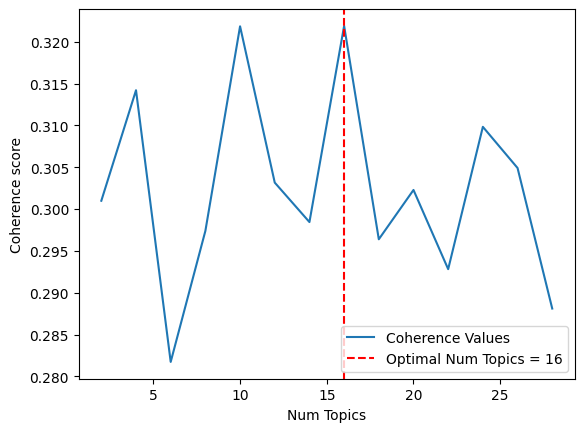

Optimal Number of Topics: 16


In [28]:
# یافتن تعداد بهینه تاپیک با استفاده از Elbow Method
optimal_num_topics = coherence_values.index(max(coherence_values)) * 2 + 2

# نمودار coherence
limit = 30
start = 2
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values, label="Coherence Values")
plt.axvline(x=optimal_num_topics, color='red', linestyle='--', label=f'Optimal Num Topics = {optimal_num_topics}')

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.show()

print(f"Optimal Number of Topics: {optimal_num_topics}")

In [29]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
COHERENCE = "u_mass"

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=COHERENCE)
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

In [30]:
# محاسبه coherence برای تعداد مختلف تاپیک
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, limit=30, start=2, step=2)

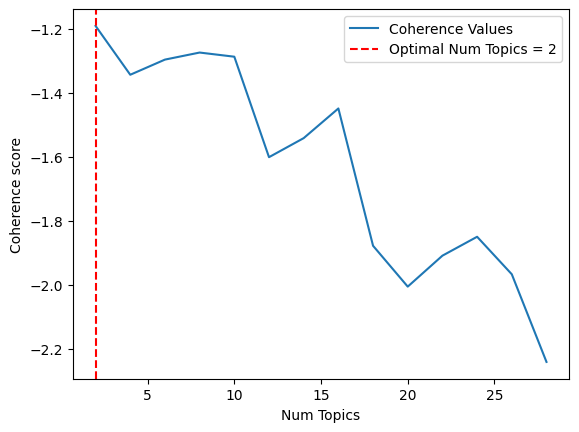

Optimal Number of Topics: 2


In [31]:
# یافتن تعداد بهینه تاپیک با استفاده از Elbow Method
optimal_num_topics = coherence_values.index(max(coherence_values)) * 2 + 2

# نمودار coherence
limit = 30
start = 2
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values, label="Coherence Values")
plt.axvline(x=optimal_num_topics, color='red', linestyle='--', label=f'Optimal Num Topics = {optimal_num_topics}')

plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.show()

print(f"Optimal Number of Topics: {optimal_num_topics}")

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -1.1919
Num Topics = 4  has Coherence Value of -1.3445
Num Topics = 6  has Coherence Value of -1.2972
Num Topics = 8  has Coherence Value of -1.2751
Num Topics = 10  has Coherence Value of -1.2881
Num Topics = 12  has Coherence Value of -1.602
Num Topics = 14  has Coherence Value of -1.5425
Num Topics = 16  has Coherence Value of -1.4498
Num Topics = 18  has Coherence Value of -1.8788
Num Topics = 20  has Coherence Value of -2.0064
Num Topics = 22  has Coherence Value of -1.9097
Num Topics = 24  has Coherence Value of -1.8506
Num Topics = 26  has Coherence Value of -1.9678
Num Topics = 28  has Coherence Value of -2.2416


In [33]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [34]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"agricultural" + 0.010*"cost" + 0.010*"food" + 0.009*"order" + '
  '0.009*"transport" + 0.008*"process" + 0.008*"product" + 0.007*"good" + '
  '0.006*"information" + 0.006*"discrepancy"'),
 (1,
  '0.031*"ai" + 0.015*"risk" + 0.015*"technology" + '
  '0.013*"artificial_intelligence" + 0.009*"review" + 0.008*"integration" + '
  '0.008*"potential" + 0.007*"identify" + 0.007*"analysis" + 0.007*"business"'),
 (2,
  '0.024*"machine" + 0.018*"information" + 0.017*"credit" + 0.016*"risk" + '
  '0.016*"learn" + 0.013*"sme" + 0.009*"learning" + 0.009*"predict" + '
  '0.007*"datum" + 0.007*"application"'),
 (3,
  '0.026*"learn" + 0.025*"machine" + 0.020*"optimization" + 0.016*"demand" + '
  '0.015*"datum" + 0.010*"deep" + 0.010*"learning" + 0.009*"efficiency" + '
  '0.009*"inventory" + 0.008*"forecasting"'),
 (4,
  '0.017*"blood" + 0.013*"optimization" + 0.011*"performance" + '
  '0.009*"vaccine" + 0.009*"base" + 0.007*"simulation" + 0.006*"enterprise" + '
  '0.006*"problem" + 0.006

In [35]:
! pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.7 MB/s eta 0:00:00


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [37]:
p = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(p, 'lda.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
lda_model.save('lda.model')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]], columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])], ignore_index=True)
            else:
                break

    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# افزودن ستون‌های جدید به DataFrame اصلی با استفاده از pd.concat()
df_dominant_topic = pd.concat([df_dominant_topic, papers[['Title', 'Authors', 'Source Title', 'Year']]], axis=1)

df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Title,Authors,Source Title,Year
0,0,2,0.4849,"machine, information, credit, risk, learn, sme...","[electronic, internet, utmost, importance, com...",6G IoT Tracking- and Machine Learning-Enhanced...,"Liang, W; Zhang, L; Kadoch, M",ELECTRONICS,2023
1,1,2,0.5951,"machine, information, credit, risk, learn, sme...","[circuit, computer, rapid, development, econom...",A Big Data-Driven Risk Assessment Method Using...,Ma Z.; Yang X.; Miao R.,"Journal of Circuits, Systems and Computers",2023
2,2,0,0.7707,"agricultural, cost, food, order, transport, pr...","[electronic, last, decade, pharmaceutical, com...",A Blockchain and Machine Learning-Based Drug S...,"Abbas, K; Afaq, M; Khan, TA; Song, WC",ELECTRONICS,2020
3,3,4,0.4206,"blood, optimization, performance, vaccine, bas...","[accounting, review, propose, type, machine, l...",A circularity accounting network: CO2 measurem...,Jesse F.F.; Antonini C.; Luque-Vilchez M.,Revista de Contabilidad-Spanish Accounting Review,2023
4,4,1,0.8430,"ai, risk, technology, artificial_intelligence,...","[operation, integration, blockchain, artificia...",A critical analysis of the integration of bloc...,"Charles, V; Emrouznejad, A; Gherman, T",ANNALS OF OPERATIONS RESEARCH,2023
5,5,3,0.4990,"learn, machine, optimization, demand, datum, d...","[computer, industrial_engineere, organization,...",A cross-temporal hierarchical framework and de...,"Punia, S; Singh, SP; Madaan, JK",COMPUTERS & INDUSTRIAL ENGINEERING,2020
6,6,0,0.5443,"agricultural, cost, food, order, transport, pr...","[mathematical, modeling, compute, many, food, ...",A decentralized model to ensure traceability a...,Addou K.; El Ghoumari M.Y.; Achkdir S.; Azzoua...,Mathematical Modeling and Computing,2023
7,7,5,0.5725,"evaluation, risk, enterprise, base, internet, ...","[international_journal, production, economic, ...",A federated machine learning approach for orde...,"Kong, LX; Zheng, G; Brintrup, A",INTERNATIONAL JOURNAL OF PRODUCTION ECONOMICS,2024
8,8,5,0.4982,"evaluation, risk, enterprise, base, internet, ...","[international_journal, industrial_engineere, ...",A fuzzy logic-based machine learning algorithm...,Delgoshaei A.; MohammadAzari M.; Hanjani S.E.;...,International Journal of Industrial Engineerin...,2020
9,9,1,0.7097,"ai, risk, technology, artificial_intelligence,...","[expert, application, design, improve, perform...",A hybrid machine learning-optimization framewo...,"Yousefi, A; Pishvaee, MS; Amiri, B",EXPERT SYSTEMS WITH APPLICATIONS,2024


In [40]:
df_dominant_topic.to_csv('lda_topic.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = {'Topic_Num': pd.Series([0,1,2,3,4,5])}
topic_num_keywords = pd.DataFrame(topic_num_keywords)
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts,
                                topic_contribution], axis=1)
df_dominant_topics.reset_index(drop=True, inplace=True)
df_dominant_topics.columns = ['Dominant Topic', 'Num_Document', 'Perc_Document']
df_dominant_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant Topic,Num_Document,Perc_Document
0,0,37,0.1104
1,1,119,0.3552
2,2,28,0.0836
3,3,100,0.2985
4,4,18,0.0537
5,5,33,0.0985


In [42]:
df_dominant_topics.to_csv('lda_distrbute.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
dlabel=df_dominant_topic.groupby("Dominant_Topic")['Year'].value_counts()
dlabel.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic  Year
0               2022    13
                2023    13
                2019     3
                2021     3
                2024     3
                2020     2
1               2023    53
                2022    33
                2021    10
                2024     9
Name: count, dtype: int64

In [44]:
df1 = pd.DataFrame(dlabel)
df1.to_csv('dominant_year.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
Data_year = pd.read_csv("dominant_year.csv",encoding='latin-1')
Data_year.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Year,count
0,0,2022,13
1,0,2023,13
2,0,2019,3
3,0,2021,3
4,0,2024,3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


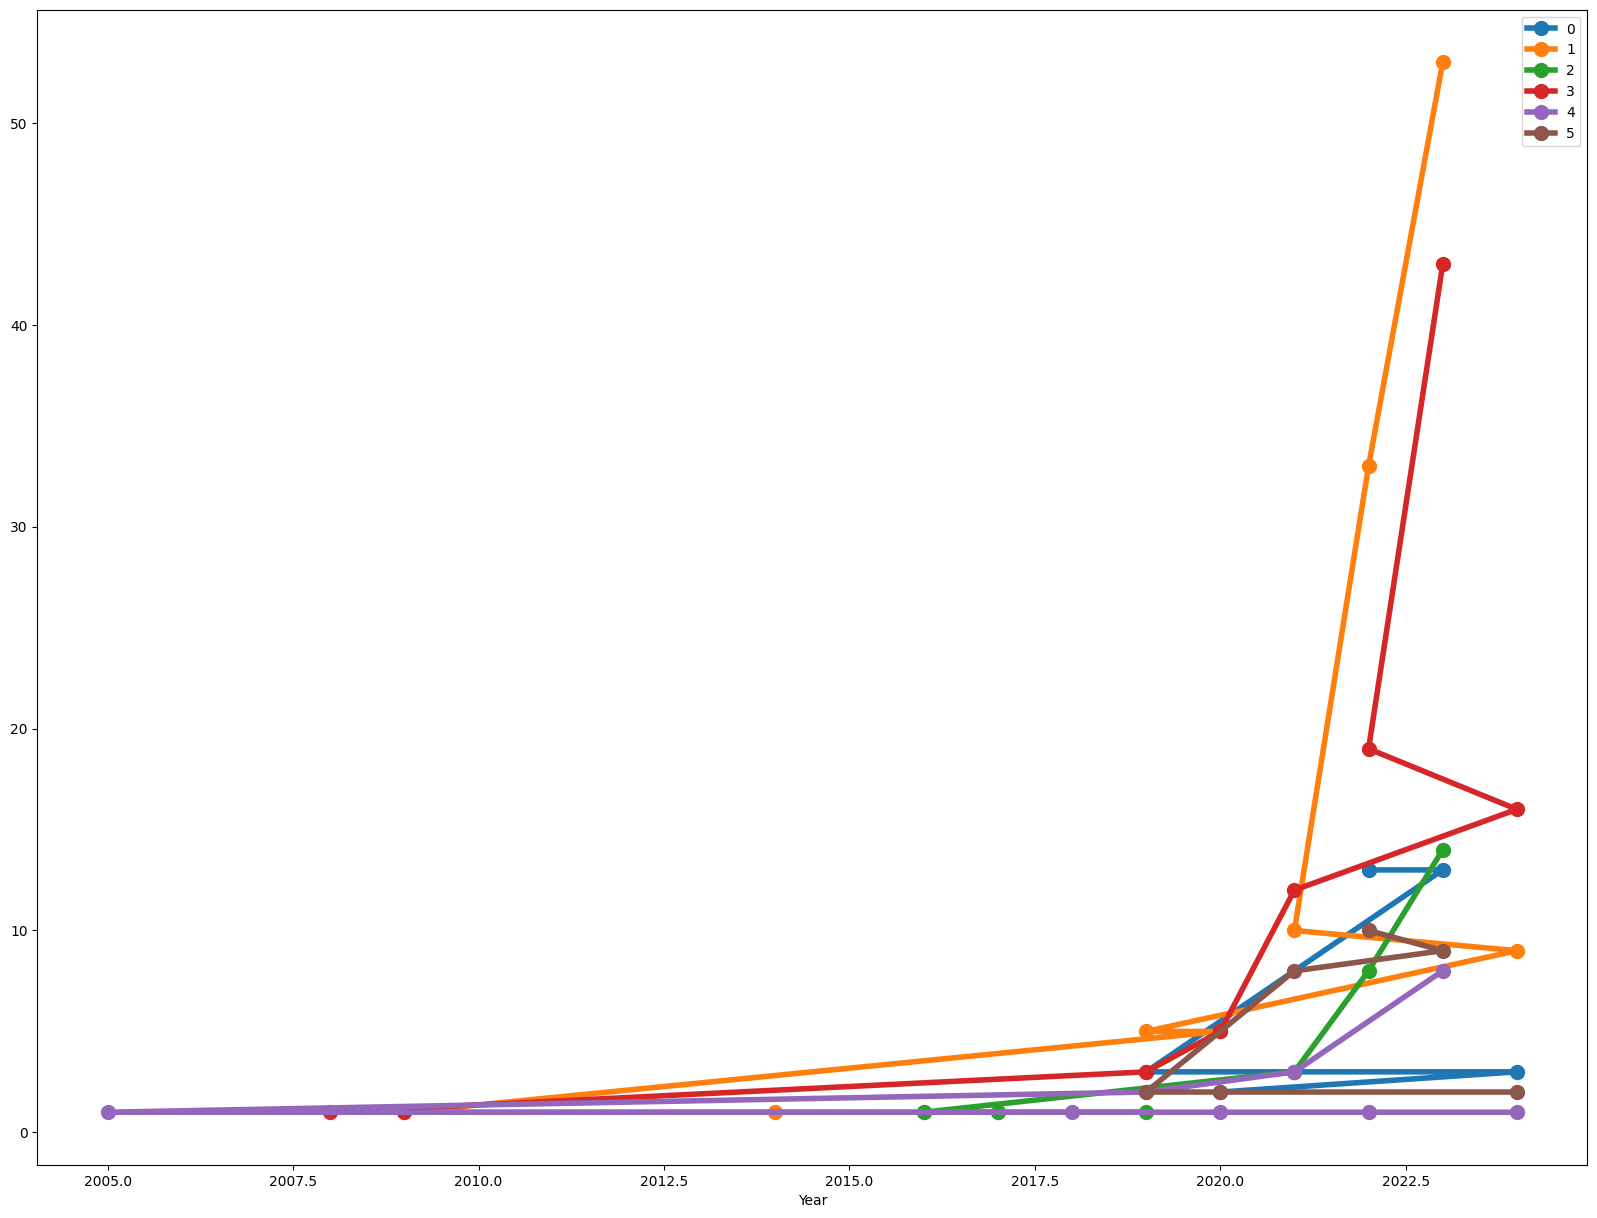

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,15))

for name, group in Data_year.groupby('Dominant_Topic'):
    group.plot(x='Year', y='count', ax=ax, label=name, marker='o',linewidth='4',markersize='10')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: {'agricultural': 0.01048937, 'cost': 0.010227543, 'food': 0.010073222, 'order': 0.0094773695, 'transport': 0.008595751, 'process': 0.007918445, 'product': 0.0076688705, 'good': 0.007239911, 'information': 0.0058758818, 'discrepancy': 0.0058234134, 'transportation': 0.0056011244, 'propose': 0.005496382, 'monitor': 0.0054372954, 'supplier': 0.005386012, 'quality': 0.0051859184, 'scheme': 0.0051109646, 'datum': 0.0050771446, 'set': 0.0049349526, 'technology': 0.0047667013, 'time': 0.0047424445, 'smart': 0.004689099, 'make': 0.0046775257, 'transfer': 0.0046487064, 'traceability': 0.0044777514, 'consumer': 0.004477183, 'blockchain': 0.004470352, 'possible': 0.004405927, 'delivery': 0.004337852, 'track': 0.0042618304, 'number': 0.0041812477, 'area': 0.004133867, 'drug': 0.004113875, 'machine': 0.004064864, 'crop': 0.0040383926, 'type': 0.003981905, 'problem': 0.0038177413, 'wagner': 0.0038132581, 'stakeholder': 0.0038052062, 'show': 0.003801197, 'internet': 0.0037536733, 'work': 0.0

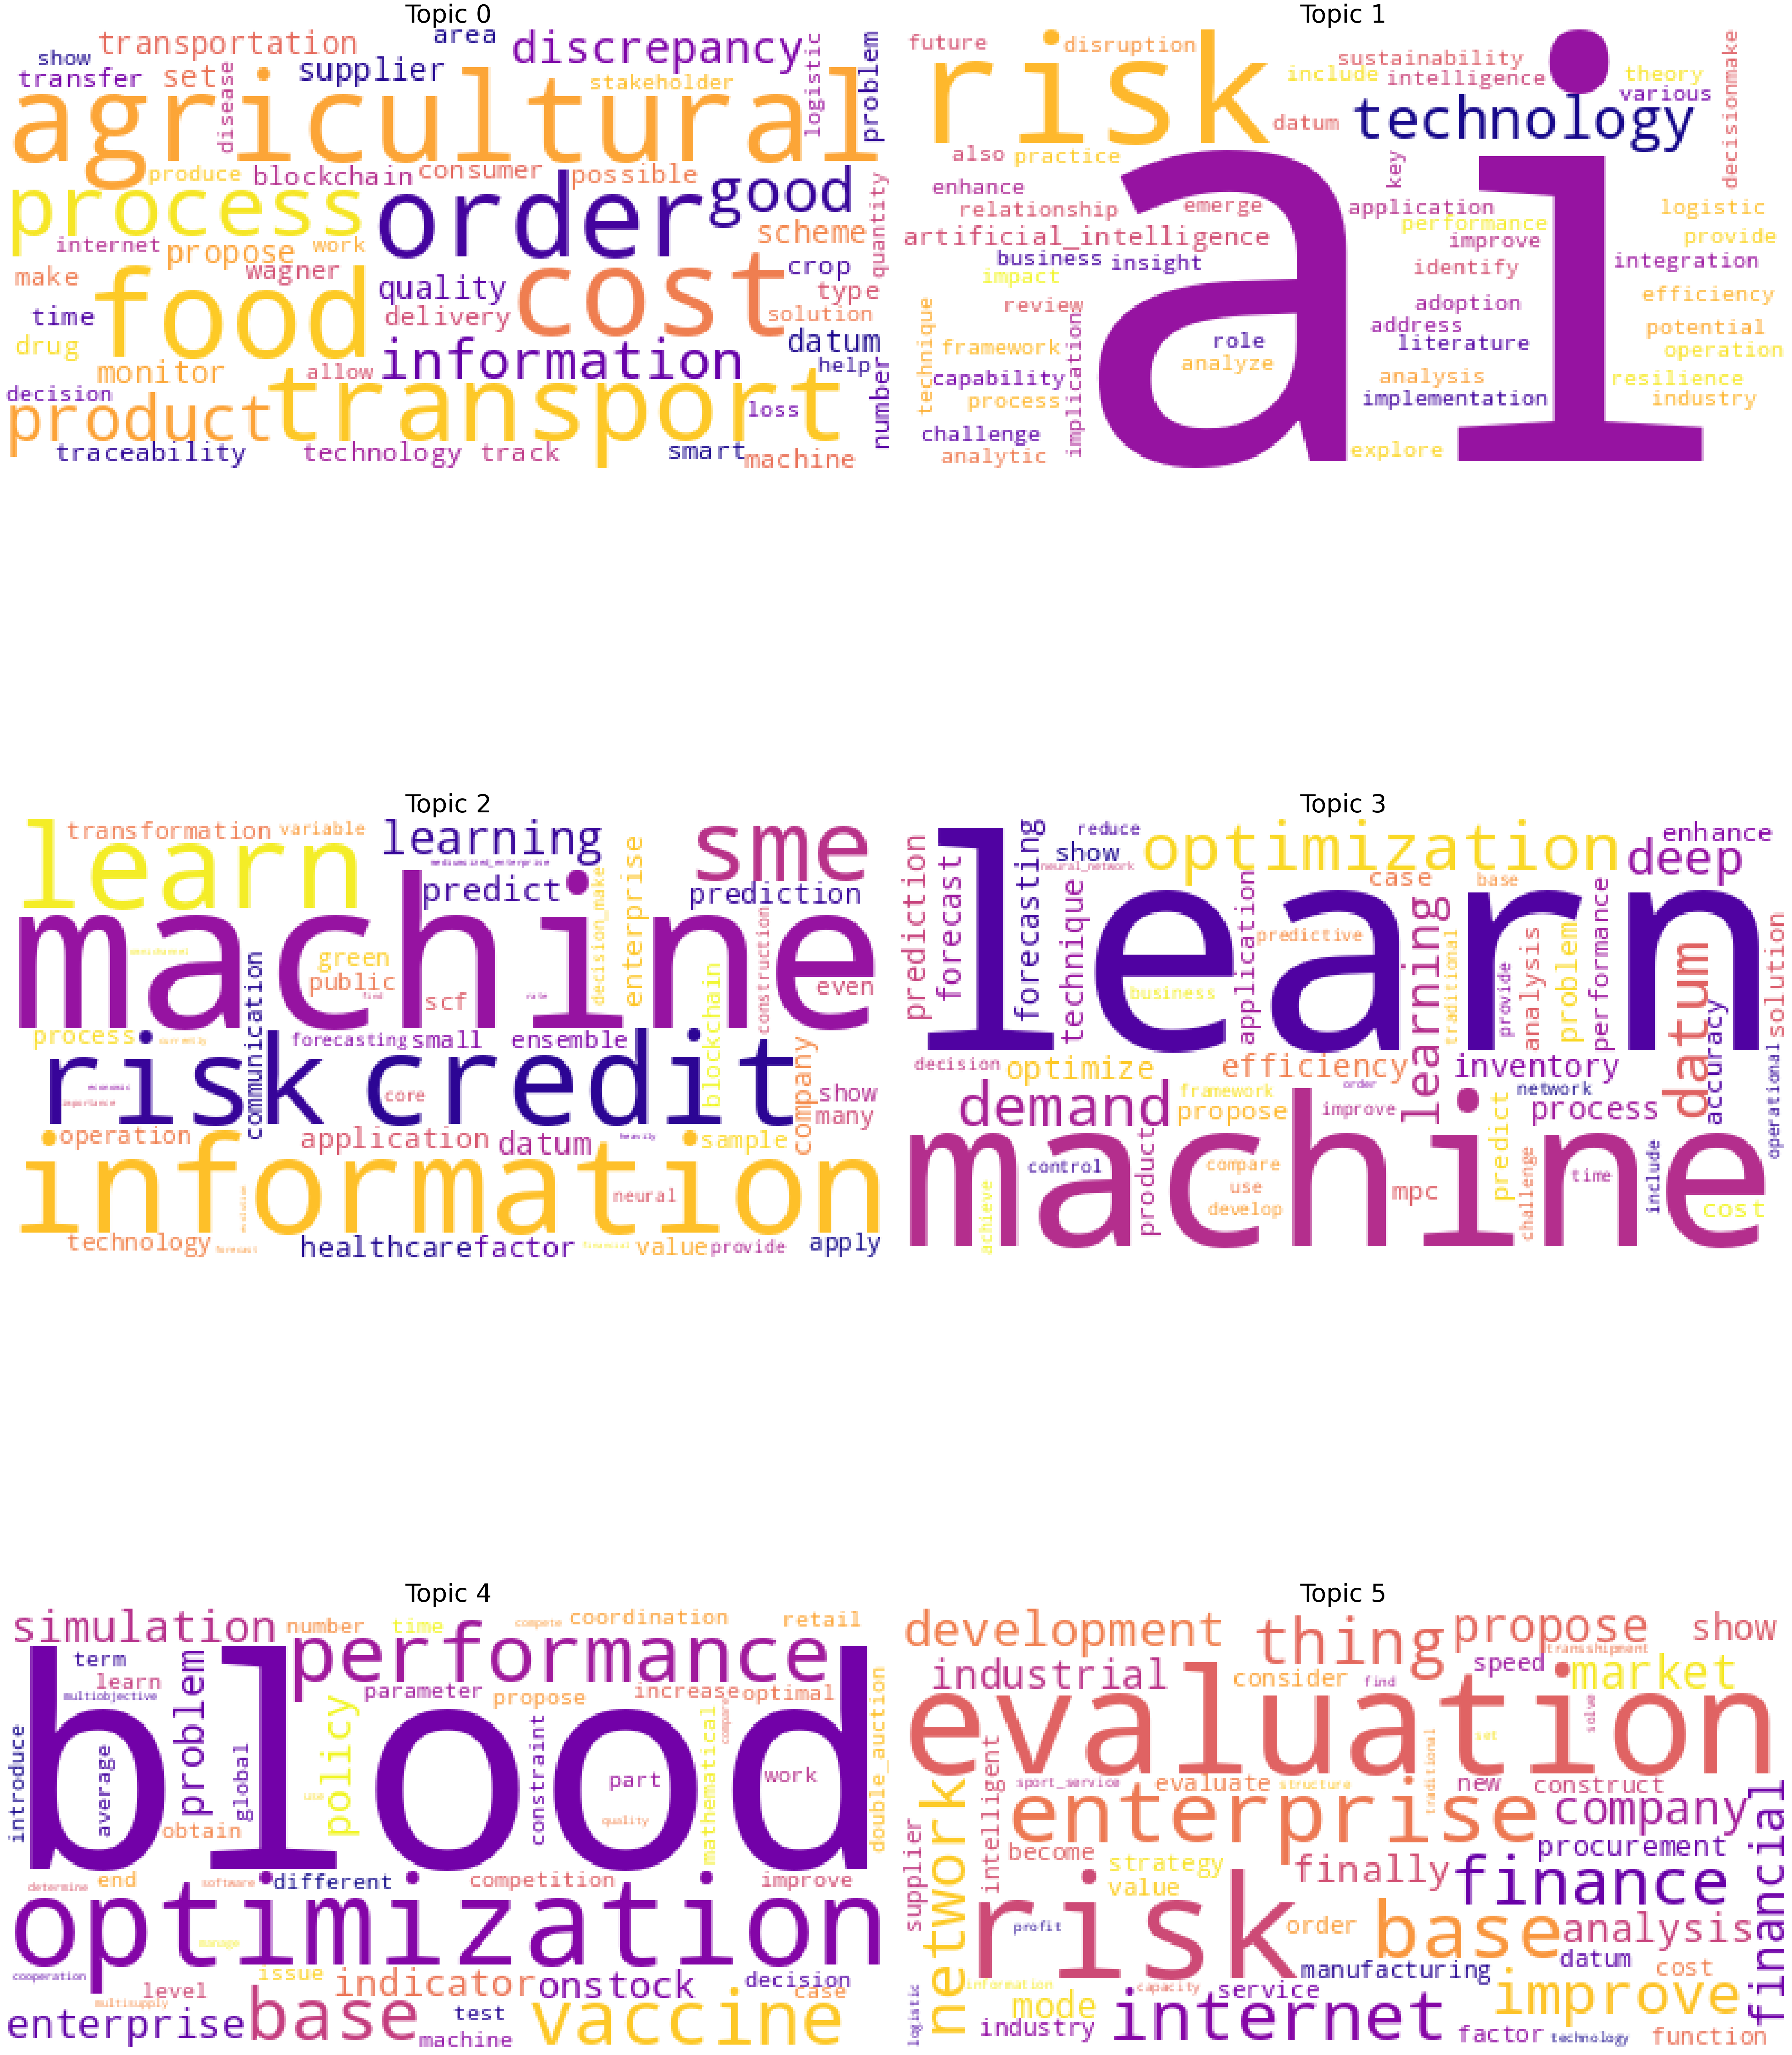

In [47]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
for idx, model in enumerate(lda_model[corpus]):
    wc = WordCloud(max_words = len(corpus),
                 background_color = 'white',
                 stopwords = set(),
                 colormap = 'plasma')
topics = lda_model.show_topics(formatted=False, num_topics = 6, num_words = 50)

fig, axes = plt.subplots(3, 2, figsize=(50,75), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    print(f"Topic {i}: {topic_words}\n")

    wc.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(wc)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=50))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
